# Kernels

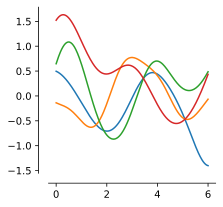

In [1]:
import matplotlib.pyplot as plt

from mini_gpr import kernels
from mini_gpr.viz import sample_kernel

sample_kernel(kernels.RBF())

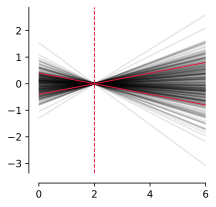

In [2]:
# feel free to change these values
scale = 0.2
m = 2

sample_kernel(
    kernels.Linear(m=m, scale=scale), n_samples=300, c="k", alpha=0.1, seed=42
)
plt.axvline(m, color="crimson", ls="--", lw=1)
plt.axline((m, 0), slope=scale, color="crimson", lw=1)
plt.axline((m, 0), slope=-scale, color="crimson", lw=1)
plt.xlim(0, 6);

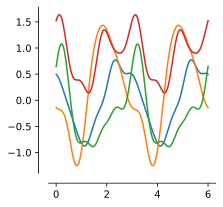

In [3]:
sample_kernel(kernels.Periodic(period=3, sigma=1))

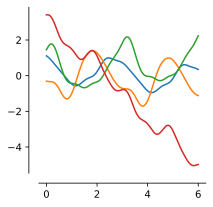

In [4]:
sample_kernel(
    kernels.Periodic(period=3, sigma=1) + kernels.Linear(m=2)
)

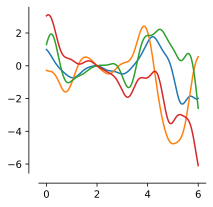

In [5]:
sample_kernel(
    kernels.Periodic(period=3, sigma=1) * kernels.Linear(m=2)
)

## Higher dimensions

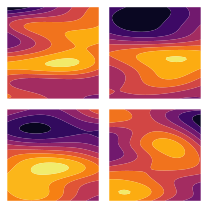

In [27]:
from mini_gpr.models import GPR
from mini_gpr.tutorials import get_grid


def sample_2d_kernel(k):
    x, y, X = get_grid((-1, 1), (-1, 1), N=50)
    _model = GPR(kernel=k, noise=0.0)
    Z = _model.sample_prior(X, n_samples=4, rng=42)

    _, axs = plt.subplots(2, 2, figsize=(3, 3))
    for z, ax in zip(Z.T, axs.flat, strict=True):
        ax.contourf(x, y, z.reshape(50, 50), cmap="inferno")
        ax.axis("off")
        ax.set_aspect("equal")

    plt.tight_layout()


sample_2d_kernel(kernels.RBF(sigma=[1, 0.3]))

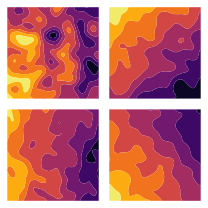

In [45]:
sample_2d_kernel(kernels.DotProduct() + kernels.RBF(sigma=0.15, scale=0.2))